(rank_estimation)=
# Rank Estimation

If interparticle interaction effects can be ignored, the rank of the data set (as a matrix) can be considered equal to the number of components. For example under such assumption, if the number of components is two, the rank is also two. In this sense, the rank of UV data is equal to the number of components because interparticle effects are known to appear only for X-ray data (in this UV vs. X-ray contrast).

To put it practically, what we usually have to do is such that we will first idetify the component peaks by decomposition and then decide the rank of each component peak to be either 1 ro 2. For example, in the case of “SAMPLE1” data, the ranks of component peaks are suumarized in the table below in the order of elution.

| component  peak   | rank  |
| :---------------- | ----: |
| first (left) peak |  1    |
| bump on the right side of the first peak | 1 |
| second peak | 1 |

The ranks are all 1 (and this estimation will be denoted by [1,1,1]) since there are observed no significant signs of interparticle effects.

We will explore briefly about this rank estimation problem below.

## Learning Points
* component peak
* ssd.plot_component(ratio_curve=True)
* scds = decomposition.compute_scds()
* rank = scd_to_rank(scd)

## Human Observation

As can be speculated from the examples shown so far, human observation plays a key role in the rank estimation. Roughly speaking, the rank of data is at least the number of visible peaks.

By observig the elution curves, humans can guess the number of components. For example as in the case of SAMPLE1 data, like decomposing into three seems better than two due to the bump in the right side of the first visible peak. See the difference in the following ddecompositons: the first one with two components (from default rough recongnition) and the second one with explictily specified three components.

zeros at the angular ends of error data have been replaced with the adjacent values.
developer memo: remember that "LowRank.CoupledAdjuster.select_components" is not implemented yet.


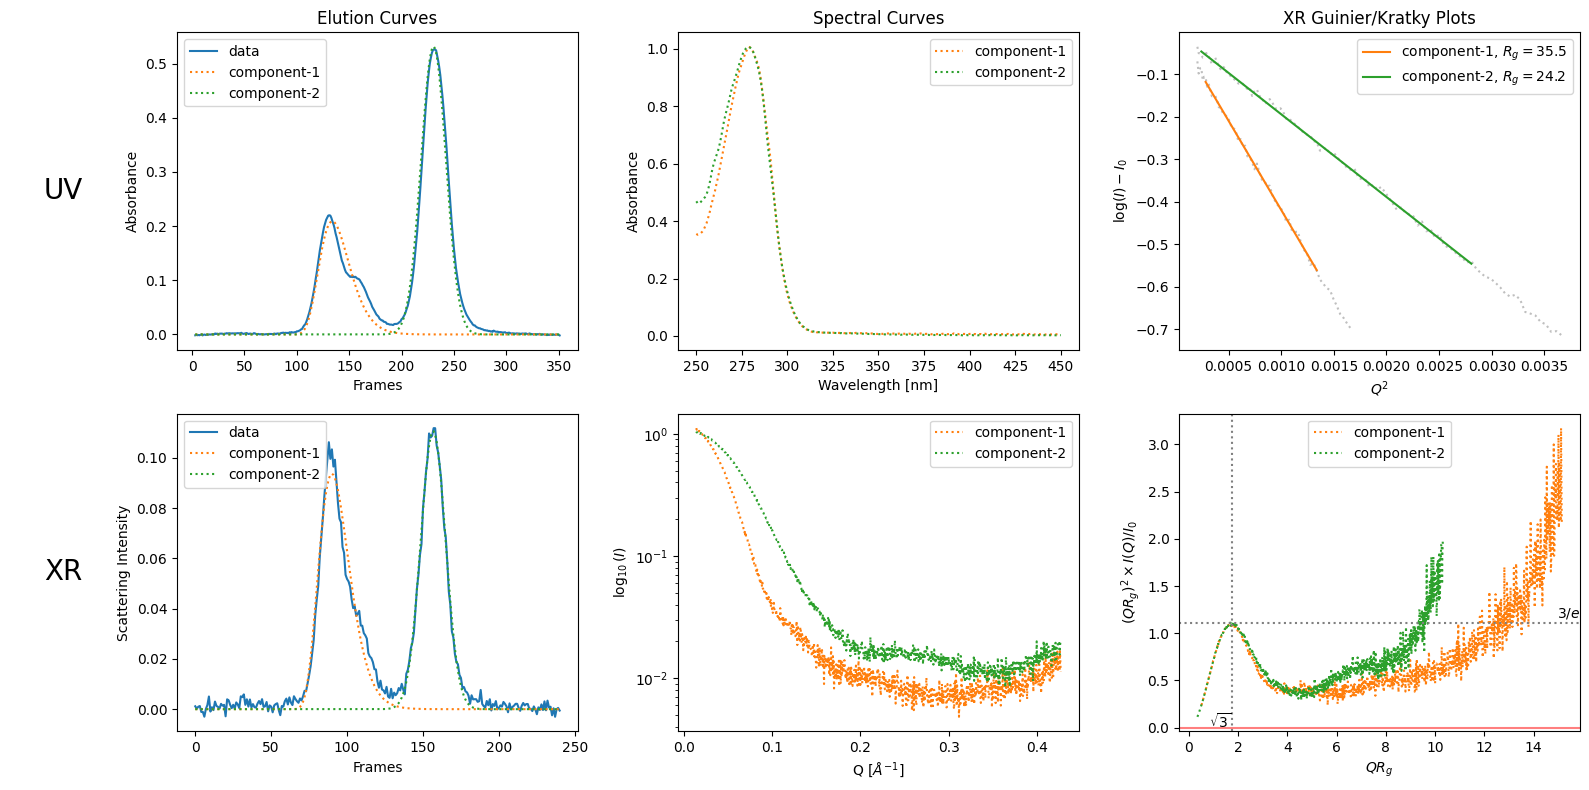

In [ ]:
from molass import get_version
assert get_version() >= '0.2.0', "This script requires molass version 0.2.0 or higher."
from molass_data import SAMPLE1
from molass.DataObjects import SecSaxsData as SSD
ssd = SSD(SAMPLE1)
trimmed_ssd = ssd.trimmed_copy()
corrected_ssd = trimmed_ssd.corrected_copy()
decomposition = corrected_ssd.quick_decomposition();
decomposition.plot_components();


developer memo: remember that "LowRank.CoupledAdjuster.select_components" is not implemented yet.


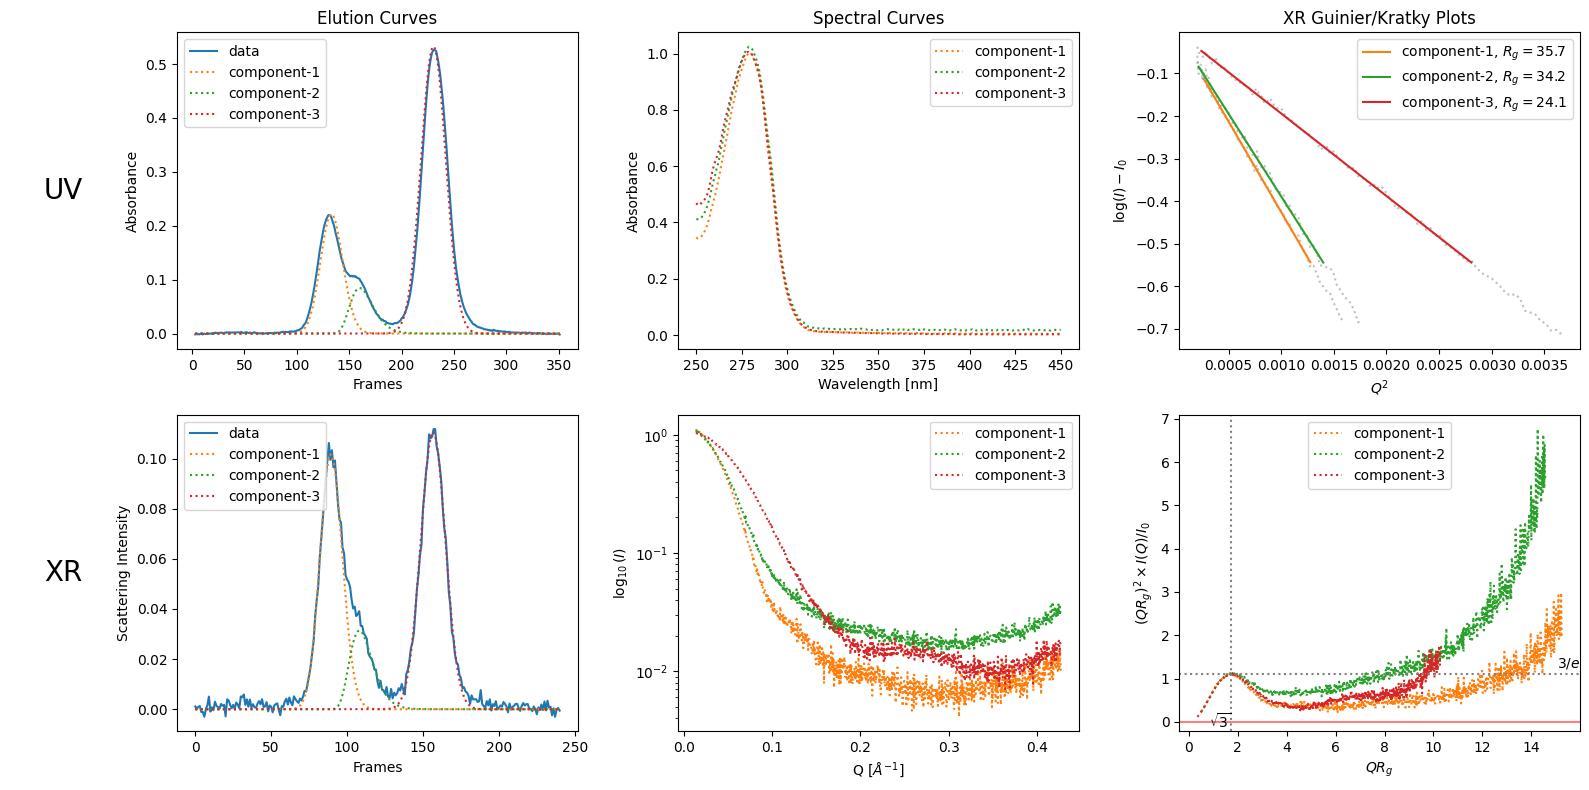

In [9]:
decomposition_nc3 = corrected_ssd.quick_decomposition(num_components=3)
decomposition_nc3.plot_components();

## Absorbance / Scattering Ratio

Sometimes, it can be useful if we observe the curve of the ratio variation between the absorbance and the scattering. We can plot it with the ratio_curve option as shown below.

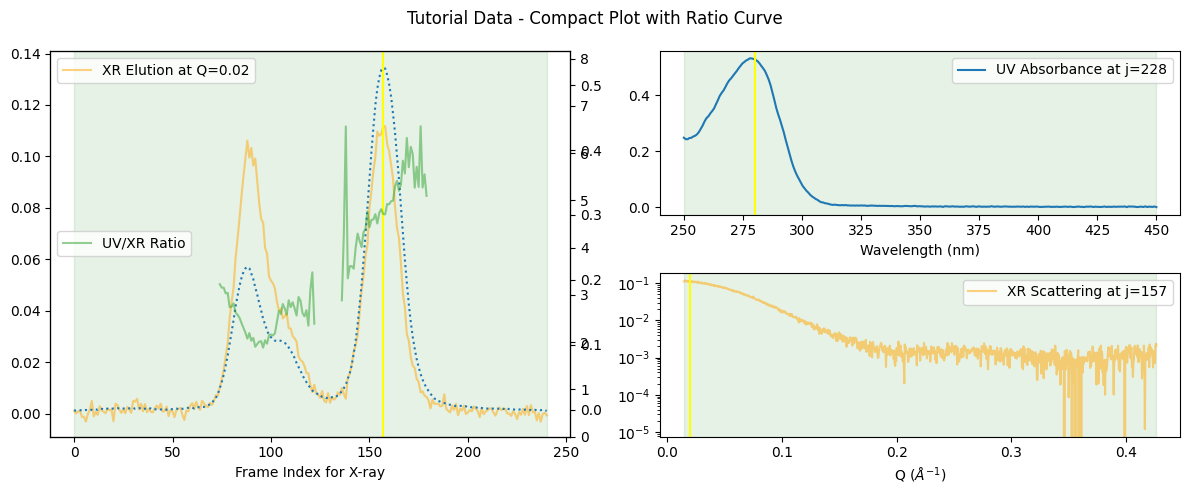

In [10]:
corrected_ssd.plot_compact(ratio_curve=True, title="Tutorial Data - Compact Plot with Ratio Curve");

## Concentration Dependence
### Relation between SCD and Rank
Another method of rank estimastion is to compute the SCD - Score of Concentration Dependence - of each component peak. Using SCD's, you can roughly distinguish the rank of a component peak according the the table below.

| SCD value range  |  Rank distinction |
| ---------------- | ----------------- |
| less than 2      |  probably  1      |
| between 2 and 5  |  uncertain        |
| greater than 5   |  probably  2      |

We will give some examples of SCD computation below.



### SAMPLE1 - Case of no concentration dependence

In [11]:
scds = decomposition_nc3.compute_scds()
scds

get_range_list: peak.area_prop= 0.3945052694721475
get_range_list: peak.area_prop= 0.12825419228150514
get_range_list: peak.area_prop= 0.47724053824634743
editor_ranges= [[[81, 89], [89, 98]], [[101, 108], [108, 118]], [[148, 157], [157, 166]]]
select_matrix= [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
top_x_list= [89, 108, 157]
legacy_ranges= [[PeakInfo(0,89,[0, ModelEvaluator(EGH(),array([ 0.22144205, 89.39315878,  7.33175192,  0.67106922]))]), [81, 89], [89, 98]], [PeakInfo(1,108,[1, ModelEvaluator(EGH(),array([8.44276569e-02, 1.08077959e+02, 7.55828545e+00, 5.47696998e+00]))]), [101, 108], [108, 118]], [PeakInfo(2,157,[2, ModelEvaluator(EGH(),array([5.32628729e-01, 1.56647360e+02, 8.16330460e+00, 8.93435324e-04]))]), [148, 157], [157, 166]]]


[0.5141964291028607, 4.056720233914737, 0.6386070838487024]

In [12]:
from molass.Backward.RankEstimator import scd_to_rank
ranks = [scd_to_rank(scd) for scd in scds]
for scd, rank in zip(scds, ranks):
    print(f"SCD: {scd}, Rank: {rank}")

SCD: 0.5141964291028607, Rank: 1
SCD: 4.056720233914737, Rank: 1
SCD: 0.6386070838487024, Rank: 1


### SAMPLE3 - Case of significant concentration dependence

In [13]:
from molass_data import SAMPLE3
ssd3 = SSD(SAMPLE3)
decomposition3 = ssd3.quick_decomposition()
scds = decomposition3.compute_scds()
scds

developer memo: remember that "LowRank.CoupledAdjuster.select_components" is not implemented yet.


get_range_list: peak.area_prop= 1.0
editor_ranges= [[[167, 196], [196, 221]]]
select_matrix= [[1]]
top_x_list= [196]
legacy_ranges= [[PeakInfo(0,196,[0, ModelEvaluator(EGH(),array([  0.37731962, 196.4855396 ,  22.96765958, -15.02150513]))]), [167, 196], [196, 221]]]


[5.136732388051838]

In [14]:
ranks = [scd_to_rank(scd) for scd in scds]
for scd, rank in zip(scds, ranks):
    print(f"SCD: {scd}, Rank: {rank}")

SCD: 5.136732388051838, Rank: 2
